## Time Sensitive Real Interview Questions-1

In this task below, you must answer these questions within 2 hours using data analysis skills (You can use any tool). Data file is provided via slack channel .

#### 1. How many rows in the sales dataset? 

answer 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("sales.csv")

In [3]:
len(sales)

237671

#### 2. How many columns in the sales dataset? 

answer 2

In [4]:
sales.shape

(237671, 10)

In [5]:
sales.head()

,buyer_id,buyer_country,seller_id,seller_country,product_code,category,brand,currency,price,date
0,qzpjsi9t0o,GB,6oufpaot,GB,ydecnydr6obf,Dresses,NaN,GBP,19.11,2020-08-03
1,o79pns1qwo,GB,50xki2yg,GB,38chj507o6h2,Outerwear,Adidas Originals,GBP,15.92,2020-08-09
2,sjgbjdkhqx,GB,50xki2yg,GB,i9ynyxj5tdp8,Tops - Mens,NaN,GBP,6.37,2020-08-07
3,o79pns1qwo,GB,s0p322hh,GB,t50xe7moye8v,Tops - Mens,Berghaus,GBP,25.27,2020-08-09
4,o79pns1qwo,GB,dpkx192v,GB,hp4r9bjq68af,Bottoms - Womens,NaN,GBP,8.90,2020-08-09


#### 3. What is the total number of sellers? 

answer 3

In [6]:
sales.seller_id.nunique()

114227

#### 4. What is the total value of sales in EUR?

answer 4

In [7]:
currency = pd.read_csv('currency_rates.csv')

In [8]:
currency.head()

,currency,date,rate
0,EUR,8/1/2020,1.0
1,EUR,8/2/2020,1.0
2,EUR,8/3/2020,1.0
3,EUR,8/4/2020,1.0
4,EUR,8/5/2020,1.0


In [9]:
currency.date.dtype

dtype('O')

In [10]:
currency.date = pd.to_datetime(currency.date)

In [11]:
currency.date.dtype.type

numpy.datetime64

In [12]:
sales.date = pd.to_datetime(sales.date)

In [13]:
sales.date.dtype.type

numpy.datetime64

In [14]:
new_df = sales.merge(currency, how = "inner", on = ["currency","date"])

In [15]:
new_df.tail()

,buyer_id,buyer_country,seller_id,seller_country,product_code,category,brand,currency,price,date,rate
237666,d7dx6f3qv7,RoW,e2p108mu,RoW,nan9a4p10ayk,Tops - Mens,NaN,PLN,4.24,2020-08-04,4.39693
237667,iaf2ck3rj6,IT,gjb1qntq,RoW,lxj477q1hab2,Accessories,NaN,CZK,3923.18,2020-08-04,26.12360
237668,tucgt70cwc,AU,9adnlxvr,RoW,2g0g0obhwjuc,Jewellery,NaN,PLN,525.82,2020-08-09,4.41427
237669,rrfjxzbdxu,US,w2pozh7u,US,5mm5eg99xbu2,Bottoms - Womens,Brandy Melville,BRL,34.92,2020-08-06,6.33240
237670,wnmihth4io,GB,5yogzc17,RoW,wrgq88ujwh5d,Bottoms - Womens,NaN,NOK,533.06,2020-08-08,10.64540


In [16]:
new_df["total"] = new_df.price / new_df.rate

In [17]:
new_df.head()

,buyer_id,buyer_country,seller_id,seller_country,product_code,category,brand,currency,price,date,rate,total
0,qzpjsi9t0o,GB,6oufpaot,GB,ydecnydr6obf,Dresses,NaN,GBP,19.11,2020-08-03,0.89935,21.248680
1,rd209r8c7c,GB,9p2ansc9,GB,wpxxf59cq7pc,Outerwear - Mens,Adidas Originals,GBP,24.91,2020-08-03,0.89935,27.697782
2,pqbcrl8azx,GB,r9zmzem8,GB,ua9mmn86wsqy,Tops - Womens,NaN,GBP,19.31,2020-08-03,0.89935,21.471062
3,j5en1rwmxp,GB,3o2nz88r,GB,tduo2uy8iszl,Bottoms - Womens,Urban Outfitters,GBP,16.98,2020-08-03,0.89935,18.880302
4,kjdezxeh1l,GB,7g56ublf,GB,39o00tcu89zq,Other,NaN,GBP,2.85,2020-08-03,0.89935,3.168955


In [18]:
new_df.total.sum()

6471510.822498876

#### 5. Which brand has the highest number of purchases during the period? *

answer 5

In [19]:
sales.brand.value_counts().head(1)  # nike

Nike    9575
Name: brand, dtype: int64

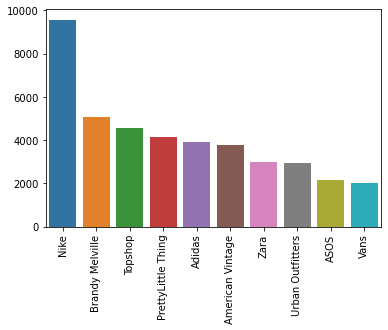

In [20]:
sns.barplot(x= sales.brand.value_counts().head(10).index, y= sales.brand.value_counts().head(10).values)
plt.xticks(rotation = 90);

<AxesSubplot:>

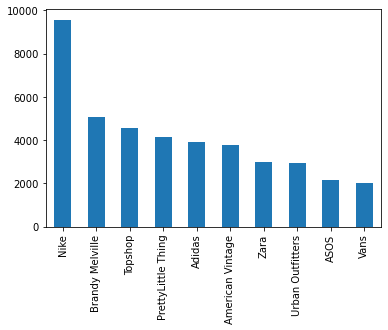

In [21]:
sales.brand.value_counts().head(10).plot.bar()

#### 6. How many items in the “Jewellery” category have no brand associated with them? *

answer 6

In [22]:
sales[(sales.category == "Jewellery")&(sales.brand.isnull())].product_code.nunique()

10931

#### 7. How many brands have between 35 and 55 transactions (inclusive)? (Suggested Chart Type: Bar Chart)

In [23]:
brands = []
for i in sales.brand.value_counts().items():
    if 35 <= i[1] <=55:
        brands.append([i[0],i[1]])
brands


[['Missy Empire', 55],
 ['George', 55],
 ['Cotton On', 53],
 ['liquid blue', 52],
 ['Oasis', 52],
 ['Marlboro', 52],
 ['Moda Minx', 52],
 ['EGO', 51],
 ['Office', 51],
 ['UGG', 50],
 ['Chaps', 50],
 ['Anthropologie', 50],
 ['Kickers', 50],
 ['Real Techniques', 50],
 ['Clinique', 49],
 ['Bebe', 49],
 ['Patta', 49],
 ['Eddie Bauer', 48],
 ['Slazenger', 48],
 ['Demonia', 48],
 ['Vlone', 48],
 ['Whistles', 48],
 ['Paul Smith', 48],
 ['Boux Avenue', 47],
 ['Pink Boutique', 46],
 ['J.Crew', 46],
 ['F&F', 46],
 ['Fabletics', 46],
 ['Herschel Supply Co.', 46],
 ['LF', 45],
 ['Jerzees', 44],
 ['Banana Republic', 44],
 ['Travis Scott', 44],
 ['Garage', 44],
 ['Kaws', 44],
 ['Barbour', 44],
 ['Weekday', 43],
 ['Rat & Boa', 43],
 ['ARE YOU AM I', 43],
 ['Jeffrey Campbell', 43],
 ['Gym King', 43],
 ['Odd Future', 43],
 ['Skinnydip', 43],
 ['SIKSILK', 43],
 ['BaByliss', 42],
 ['NYX', 42],
 ['Select Fashion', 42],
 ['Faded Glory', 42],
 ['Laura Mercier', 42],
 ['Tripp NYC', 42],
 ['Polar Skate Co', 4

In [24]:
br=pd.DataFrame(brands, columns =['brand','number'])


In [25]:
br

,brand,number
0,Missy Empire,55
1,George,55
2,Cotton On,53
3,liquid blue,52
4,Oasis,52
...,...,...
76,Bobbi Brown,35
77,Mario Badescu,35
78,Jansport,35
79,Morgan De Toi,35


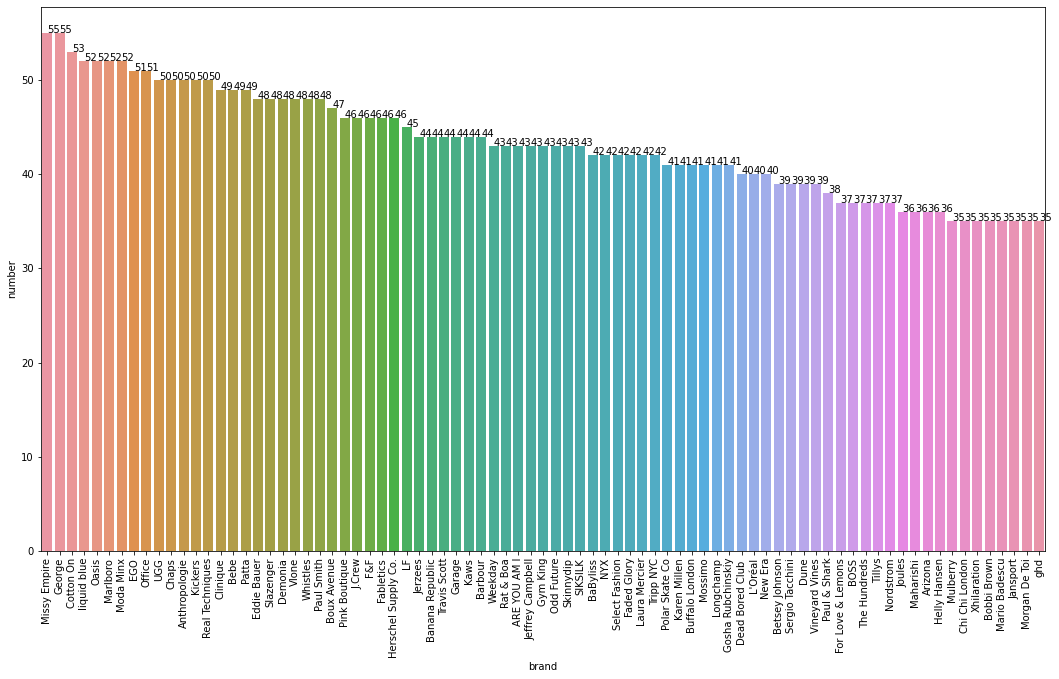

In [26]:
y= br.number
plt.figure(figsize=[18,10])
sns.barplot(x=br.brand, y=br.number)
for i,v in enumerate(y):
    plt.text(i,v, str(v))
plt.xticks(rotation = 90);

#### How many pairs of shoes were purchased by Australian (AU) buyers?

In [27]:
sales.head(3)

,buyer_id,buyer_country,seller_id,seller_country,product_code,category,brand,currency,price,date
0,qzpjsi9t0o,GB,6oufpaot,GB,ydecnydr6obf,Dresses,NaN,GBP,19.11,2020-08-03
1,o79pns1qwo,GB,50xki2yg,GB,38chj507o6h2,Outerwear,Adidas Originals,GBP,15.92,2020-08-09
2,sjgbjdkhqx,GB,50xki2yg,GB,i9ynyxj5tdp8,Tops - Mens,NaN,GBP,6.37,2020-08-07


In [28]:
len(sales[(sales.category == 'Shoes') & (sales.buyer_country == 'AU')])

658

#### Which brand has the highest average transaction value? Bring all values in Euros. (Suggested Chart Type: Horizontal Bar Chart)

In [29]:
#işlem sayısı olarak
new_df.brand.value_counts().head(1)

Nike    9575
Name: brand, dtype: int64

In [30]:
#sales olarak
new_df.groupby('brand')['total'].mean().sort_values(ascending = False)

brand
Goyard            338.926936
Loewe             334.530369
Craig Green       266.792684
TAG Heuer         224.586782
Emilio Pucci      214.758636
                     ...    
Popular Sports      4.452175
Max Factor          4.329298
Bronica             3.329066
360 Cashmere        0.950906
36572               0.950199
Name: total, Length: 1134, dtype: float64

In [31]:
brands_mean = new_df.groupby('brand')['total'].mean().sort_values(ascending = False)

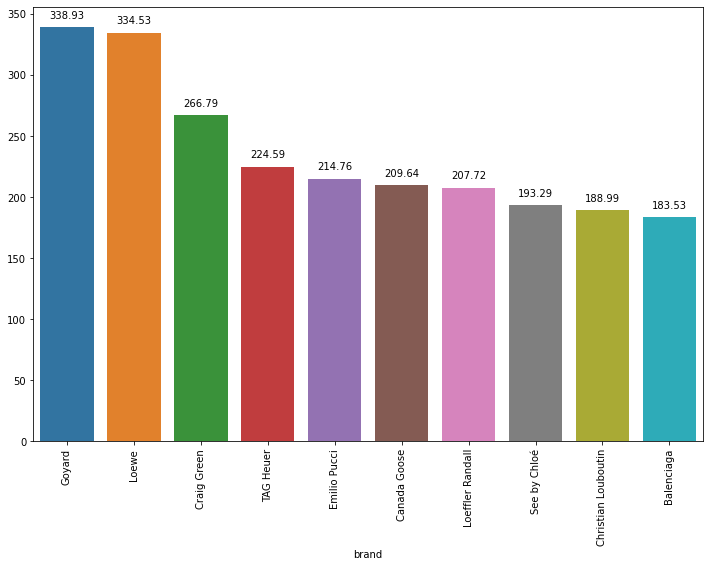

In [32]:
y=brands_mean.values[0:10]
plt.figure(figsize=[12,8])
sns.barplot(x=brands_mean.index[0:10], y=brands_mean.values[0:10])
for i,v in enumerate(y):
    plt.text(i,v+10, str(round(v,2)),horizontalalignment='center', verticalalignment='center')
plt.xticks(rotation = 90);

#### What is the total value of items purchased by GB buyers from GB sellers?

In [33]:
new_df[(new_df.buyer_country=='GB') & (new_df.seller_country=='GB')]['total'].sum()

3526745.033129233

#### What percentage of US sellers' transactions were purchased by US buyers?

In [34]:
sales[sales.seller_country == 'US']['buyer_country'].value_counts(normalize = True)

US     0.982304
CA     0.004762
RoW    0.004652
GB     0.003666
AU     0.002789
DE     0.000804
FR     0.000548
IE     0.000341
IT     0.000134
Name: buyer_country, dtype: float64

#### Which country made the highest percentage of international purchases?

In [35]:
international = new_df[new_df.seller_country != new_df.buyer_country]

In [36]:
international.buyer_country.value_counts(normalize=True).head(1)

RoW    0.272201
Name: buyer_country, dtype: float64

#### Which day has the highest value of purchases?

In [37]:
new_df.groupby('date')['total'].sum().reset_index().sort_values(by='total').tail(1)

,date,total
0,2020-08-03,1.005281e+06


#### Which category has 2,324 transactions on 7 August?

In [38]:
seven_august = new_df[new_df.date == '2020-08-07']

In [39]:
seven_august.category.value_counts()[seven_august.category.value_counts() == 2324]

Jewellery    2324
Name: category, dtype: int64

#### What percentage of global sales value on 4 August came from US sellers?

In [40]:
four_august = new_df[new_df.date == '2020-08-04']

In [41]:
#ücret olarak yüzde hesaplama
top = four_august.total.sum()

In [42]:
top_us = four_august[four_august.seller_country == 'US']['total'].sum()

In [43]:
perc = top_us / top

In [44]:
perc

0.3327165931227377

In [45]:
#işlem olarak yüzde heaplama
four_august.seller_country.value_counts(normalize = True)

GB     0.582431
US     0.354303
AU     0.028606
IE     0.011037
IT     0.010917
CA     0.008024
RoW    0.003967
DE     0.000567
FR     0.000149
Name: seller_country, dtype: float64

#### How many sellers in the US has more than 75 sales?

In [46]:
new_df.head(3)

,buyer_id,buyer_country,seller_id,seller_country,product_code,category,brand,currency,price,date,rate,total
0,qzpjsi9t0o,GB,6oufpaot,GB,ydecnydr6obf,Dresses,NaN,GBP,19.11,2020-08-03,0.89935,21.248680
1,rd209r8c7c,GB,9p2ansc9,GB,wpxxf59cq7pc,Outerwear - Mens,Adidas Originals,GBP,24.91,2020-08-03,0.89935,27.697782
2,pqbcrl8azx,GB,r9zmzem8,GB,ua9mmn86wsqy,Tops - Womens,NaN,GBP,19.31,2020-08-03,0.89935,21.471062


In [47]:
sales.head(3)

,buyer_id,buyer_country,seller_id,seller_country,product_code,category,brand,currency,price,date
0,qzpjsi9t0o,GB,6oufpaot,GB,ydecnydr6obf,Dresses,NaN,GBP,19.11,2020-08-03
1,o79pns1qwo,GB,50xki2yg,GB,38chj507o6h2,Outerwear,Adidas Originals,GBP,15.92,2020-08-09
2,sjgbjdkhqx,GB,50xki2yg,GB,i9ynyxj5tdp8,Tops - Mens,NaN,GBP,6.37,2020-08-07


In [60]:
a = sales[sales.seller_country == 'US'].groupby('seller_id')['product_code'].count()

In [62]:
len(a[a>75])

22

#### Which seller in the US sold the most in terms of value?

In [66]:
sales[sales.seller_country == 'US'].groupby('seller_id')['price'].sum().sort_values(ascending = False).head(1)

seller_id
pzsiehl0    24279.78
Name: price, dtype: float64

#### Which brand had the largest absolute € difference in average transaction value between domestic and international?

In [82]:
international = new_df[new_df.seller_country != new_df.buyer_country].groupby('brand').total.mean().reset_index()

In [83]:
international

,brand,total
0,& Other Stories,42.343874
1,11 Degrees,20.156993
2,6%DOKIDOKI,76.539139
3,A-COLD-WALL,119.655268
4,A.P.C.,39.426484
...,...,...
435,ZAFUL,17.836962
436,Zadig & Voltaire,96.444718
437,Zara,36.004586
438,Zoeva,21.455947


In [80]:
domestic = new_df[new_df.seller_country == new_df.buyer_country].groupby('brand').total.mean().reset_index()

In [81]:
domestic

,brand,total
0,& Other Stories,32.610605
1,032c,36.693996
2,11 Degrees,13.971744
3,1822 Denim,18.089935
4,3.1 Phillip Lim,32.805235
...,...,...
1116,ghd,59.621800
1117,kensie,19.751443
1118,liquid blue,38.920505
1119,mixxmix,15.924378


In [87]:
international_domestic = international.merge(domestic, how = 'inner', on = 'brand')

In [88]:
international_domestic

,brand,total_x,total_y
0,& Other Stories,42.343874,32.610605
1,11 Degrees,20.156993,13.971744
2,6%DOKIDOKI,76.539139,29.101939
3,A-COLD-WALL,119.655268,56.174666
4,A.P.C.,39.426484,38.244340
...,...,...,...
422,ZAFUL,17.836962,14.535228
423,Zadig & Voltaire,96.444718,45.426505
424,Zara,36.004586,20.067448
425,Zoeva,21.455947,8.567322


In [89]:
international_domestic['diffirence'] = international_domestic.total_x - international_domestic.total_y

In [92]:
international_domestic[international_domestic.diffirence == international_domestic.diffirence.max()]

,brand,total_x,total_y,diffirence
146,Goyard,611.456926,202.661941,408.794985


In [94]:
international_domestic.sort_values(by = 'diffirence', ascending= False)

,brand,total_x,total_y,diffirence
146,Goyard,611.456926,202.661941,408.794985
215,Loewe,461.082817,81.425474,379.657343
159,Hermes,267.749153,57.048961,210.700192
270,Needles,314.338133,115.458082,198.880051
182,Jean-Paul Gaultier,255.332000,62.671312,192.660687
...,...,...,...,...
42,Balmain,24.829043,74.543019,-49.713976
229,Maison Margiela,115.535897,167.815184,-52.279287
233,Mansur Gavriel,109.078779,177.147715,-68.068936
335,Rick Owens,60.112860,181.538313,-121.425453
